<a href="https://colab.research.google.com/github/Dhrupad-05/Dhrupad-05/blob/main/Customer_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧩 Olist Customer Segmentation (K-Means Clustering)

This project performs **customer segmentation** on the Olist dataset using an end-to-end **machine learning pipeline**.
It applies **RFM analysis**, **K-Means clustering**, and **unsupervised evaluation metrics** to identify actionable customer segments for targeted marketing.

---

## 📌 Project Objectives

* Segment customers based on **Recency, Frequency, and Monetary (RFM)** behavior
* Identify high-value and at-risk customers
* Support data-driven **marketing and retention strategies**
* Demonstrate a **production-style ML workflow**

---

## 🔄 Workflow Overview

1. **Data Loading**

   * Olist customer dataset (with fallback synthetic data for demo)

2. **Feature Engineering**

   * RFM metrics (Recency, Frequency, Monetary)
   * Behavioral and review-based features

3. **Exploratory Data Analysis (EDA)**

   * Spending, order frequency, recency, reviews
   * Correlations and geographic distribution

4. **Feature Scaling**

   * Min-Max Scaling (required for K-Means)

5. **Elbow Method + Silhouette Analysis**

   * Optimal K selection
   * Silhouette computed on a **sample** for performance efficiency

6. **K-Means Clustering**

   * Final segmentation with optimal K

7. **Cluster Evaluation**

   * Silhouette Score
   * Davies–Bouldin Index
   * Inertia (WCSS)

8. **Business Interpretation**

   * Champions
   * Loyal Customers
   * At Risk
   * Lost Customers

9. **Visualization & Export**

   * Cluster plots and RFM heatmaps
   * CSV outputs for downstream use

---

## 📊 Customer Segments Identified

* **Champions** – High spend, frequent, recent buyers
* **Loyal Customers** – Consistent and engaged
* **At Risk** – Previously valuable but inactive
* **Lost Customers** – Low engagement and value

Each segment includes **recommended marketing strategies**.

---

## 📁 Output Files

* `eda_analysis.png` – Exploratory data analysis
* `elbow_method.png` – Optimal K selection
* `cluster_visualizations.png` – Cluster insights
* `customer_segments.csv` – Customers with segment labels
* `cluster_statistics.csv` – Segment-level metrics

---

## 🛠 Tech Stack

* Python
* Pandas, NumPy
* Matplotlib, Seaborn
* Scikit-learn
* Google Colab / Jupyter Notebook

---

## 🔗 Project Links

* 📂 **GitHub Repository**:
  [https://github.com/Dhrupad-05/Projects]

* 📊 **Dataset (Olist)**:
  [https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

* 📘 **Notebook / Colab**:
  [https://colab.research.google.com/drive/1d72jQ7oE1S8U1pTm_FAnFSh4WK-4Aw_h#scrollTo=RbCp6UTwTS1J]

* 💼 **Author / LinkedIn**:
  [https://www.linkedin.com/in/dhrupad-paitandy-899428307/]

---

## 🚀 Future Improvements

* Use real transactional joins instead of synthetic RFM
* Compare with **MiniBatchKMeans / DBSCAN**
* Add **PCA** for dimensionality reduction
* Track customer migration over time
* Integrate CLV modeling


OLIST CUSTOMER SEGMENTATION PROJECT
STEP 1: LOADING DATA
 File not found. Creating sample dataset for demonstration->
Created sample dataset with 5000 records
STEP 2: DATA CLEANING & PREPROCESSING

Missing Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Duplicate Rows: 0
 After removing duplicates: 5000 unique customers

 Creating RFM Features (Synthetic for demonstration)
Note: In production, these would be calculated from actual order data
✓ Created RFM features successfully

Feature Summary:
       total_orders  total_spent  avg_order_value  recency_score  \
count   5000.000000  5000.000000      5000.000000    5000.000000   
mean       3.985000   566.106202       179.741484      88.296190   
std        1.725506   511.436778       212.053732      11.742667   
min        1.000000    50.020000         6.190000       0.000000   
25%        3.000000   200.297500    

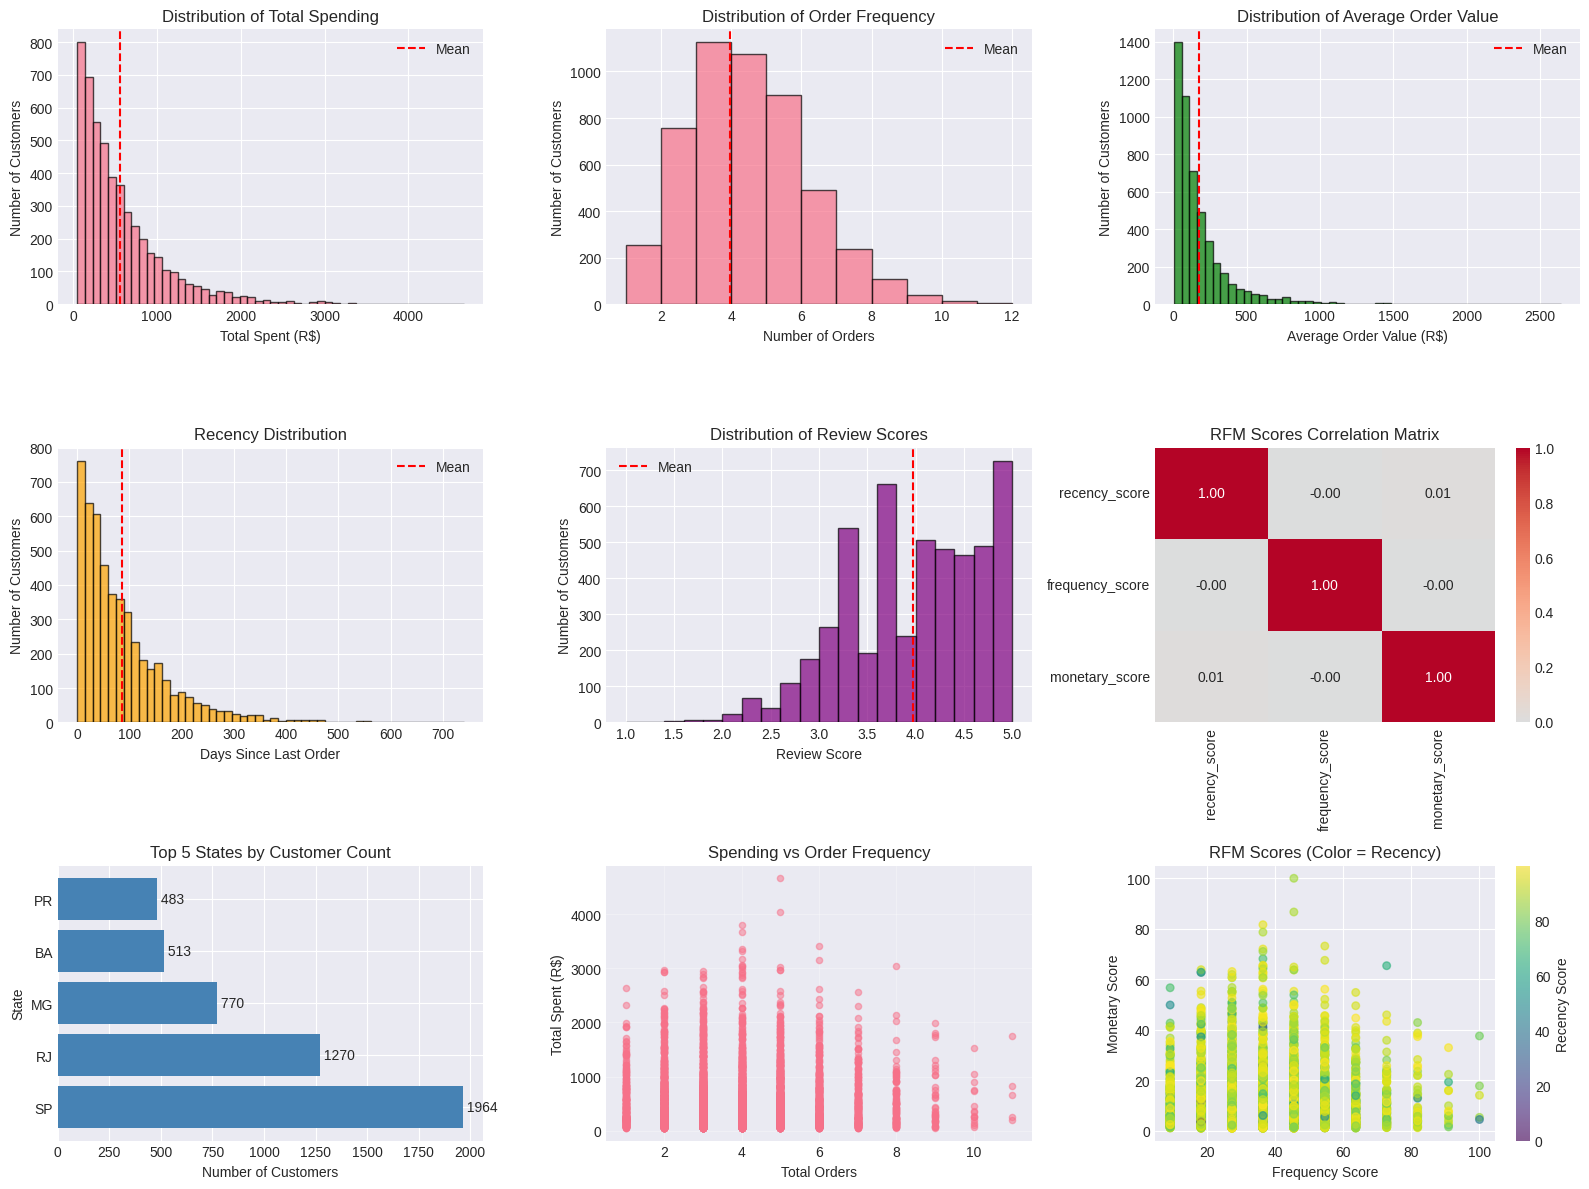

STEP 4: FEATURE SCALING

Selected Features for Clustering: ['recency_score', 'frequency_score', 'monetary_score']
Feature Matrix Shape: (5000, 3)

 Features scaled using Min-Max Scaler

Scaled Feature Statistics:
       recency_score  frequency_score  monetary_score
count    5000.000000      5000.000000     5000.000000
mean        0.882974         0.298500        0.111947
std         0.117428         0.172551        0.110939
min         0.000000         0.000000        0.000000
25%         0.840332         0.200000        0.032597
50%         0.917666         0.300000        0.078379
75%         0.965193         0.400000        0.154391
max         1.000000         1.000000        1.000000
STEP 5: ELBOW METHOD - FINDING OPTIMAL K

Using a sample of 10000 points for silhouette score computation

Testing different K values->
K=2: Inertia=181.2110, Silhouette=0.3481
K=3: Inertia=147.6718, Silhouette=0.3446
K=4: Inertia=118.6587, Silhouette=0.3579
K=5: Inertia=95.8230, Silhouette=0.3200
K=

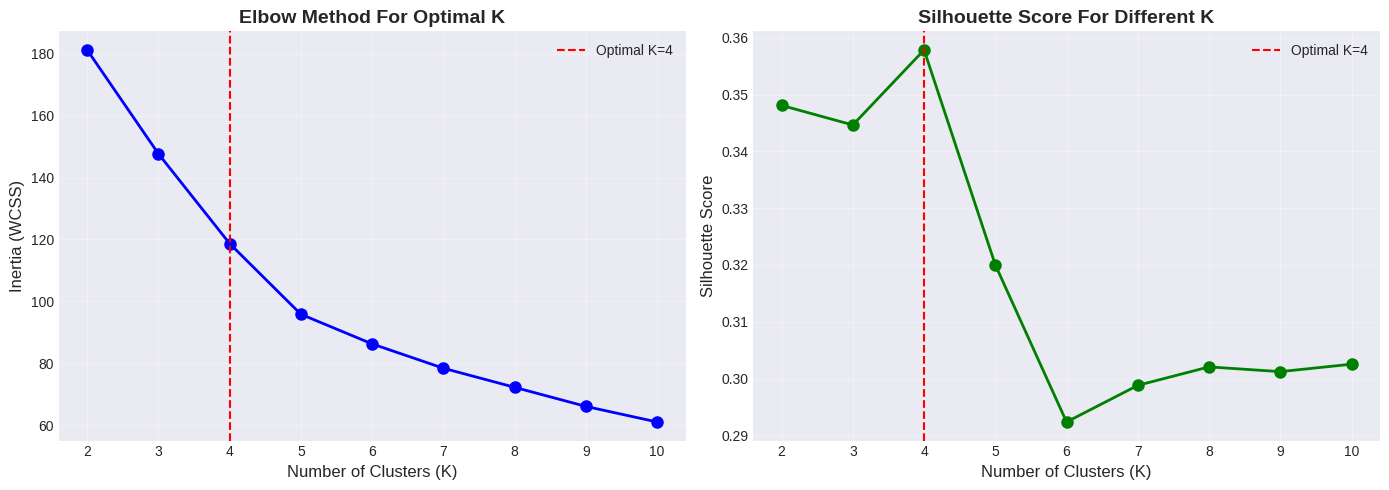


 OPTIMAL K SELECTED: 4
STEP 6: APPLYING K-MEANS CLUSTERING

 K-Means clustering completed with K=4
All 5000 customers successfully segmented
STEP 7: MODEL EVALUATION METRICS

cCLUSTERING PERFORMANCE METRICS:
Silhouette Score:        0.3560
  → Range: -1 to 1 (higher is better)
  → Interpretation: Good cluster separation

Davies-Bouldin Index:    0.9928
  → Lower is better (measures cluster separation)

Inertia (WCSS):          118.6587
  → Within-cluster sum of squares

Number of Iterations:    12

 NOTE: Clustering is UNSUPERVISED learning
   • No 'accuracy' or 'confusion matrix' (no true labels)
   • Silhouette Score and Davies-Bouldin Index are proper metrics
   • Evaluation based on cluster quality, not prediction accuracy
STEP 8: CLUSTER ANALYSIS & INTERPRETATION


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("OLIST CUSTOMER SEGMENTATION PROJECT")
#LOAD DATA
print("STEP 1: LOADING DATA")
print("="*80)

# Load the dataset
# Note: Replace with your actual file path
try:
    customers_df = pd.read_csv('olist_customers_dataset.csv')
    print(f"✓ Successfully loaded {len(customers_df)} customer records")
    print(f"\nDataset Shape: {customers_df.shape}")
    print(f"\nColumn Names: {list(customers_df.columns)}")
    print(f"\nFirst few rows:")
    print(customers_df.head())
except FileNotFoundError:
    print(" File not found. Creating sample dataset for demonstration->")
    # Create sample dataset if file not found
    np.random.seed(42)
    n_customers = 5000
    customers_df = pd.DataFrame({
        'customer_id': [f'cust_{i}' for i in range(n_customers)],
        'customer_unique_id': [f'unique_{i}' for i in range(n_customers)],
        'customer_zip_code_prefix': np.random.randint(10000, 99999, n_customers),
        'customer_city': np.random.choice(['Sao Paulo', 'Rio de Janeiro', 'Brasilia', 'Salvador', 'Belo Horizonte'], n_customers),
        'customer_state': np.random.choice(['SP', 'RJ', 'MG', 'BA', 'PR'], n_customers, p=[0.4, 0.25, 0.15, 0.1, 0.1])
    })
    print(f"Created sample dataset with {len(customers_df)} records")

# STEP 2: DATA CLEANING & PREPROCESSING

print("STEP 2: DATA CLEANING & PREPROCESSING")

#missing values
print("\nMissing Values:")
print(customers_df.isnull().sum())

# Check for duplicates
duplicates = customers_df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Remove duplicates based on customer_unique_id
if 'customer_unique_id' in customers_df.columns:
    customers_df = customers_df.drop_duplicates(subset='customer_unique_id', keep='first')
    print(f" After removing duplicates: {len(customers_df)} unique customers")

# Since the actual dataset only has customer info, we'll create synthetic RFM features
# In a real scenario, you would merge with orders, payments, and reviews datasets
print("\n Creating RFM Features (Synthetic for demonstration)")
print("Note: In production, these would be calculated from actual order data")

np.random.seed(42)
n = len(customers_df)

#RFM features
customers_df['total_orders'] = np.random.poisson(3, n) + 1  # 1-20 orders
customers_df['total_spent'] = np.random.exponential(500, n) + 50  # Spending amount
customers_df['avg_order_value'] = customers_df['total_spent'] / customers_df['total_orders']
customers_df['days_since_last_order'] = np.random.exponential(90, n)  # Recency
customers_df['review_score'] = np.random.normal(4.0, 0.8, n).clip(1, 5)  # Review scores
customers_df['product_categories'] = np.random.poisson(3, n) + 1  # Number of categories purchased

# RFM Scores (0-100)
customers_df['recency_score'] = 100 - (customers_df['days_since_last_order'] / customers_df['days_since_last_order'].max() * 100)
customers_df['frequency_score'] = (customers_df['total_orders'] / customers_df['total_orders'].max() * 100)
customers_df['monetary_score'] = (customers_df['total_spent'] / customers_df['total_spent'].max() * 100)

# Round values
customers_df['total_spent'] = customers_df['total_spent'].round(2)
customers_df['avg_order_value'] = customers_df['avg_order_value'].round(2)
customers_df['days_since_last_order'] = customers_df['days_since_last_order'].round(0)
customers_df['review_score'] = customers_df['review_score'].round(1)

print(f"✓ Created RFM features successfully")
print(f"\nFeature Summary:")
print(customers_df[['total_orders', 'total_spent', 'avg_order_value', 'recency_score', 'frequency_score', 'monetary_score']].describe())

# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

print("STEP 3: EXPLORATORY DATA ANALYSIS")


# Key Metrics
print("\n KEY METRICS ")
print(f"Total Customers: {len(customers_df):,}")
print(f"Average Spending: R$ {customers_df['total_spent'].mean():.2f}")
print(f"Average Orders per Customer: {customers_df['total_orders'].mean():.2f}")
print(f"Average Review Score: {customers_df['review_score'].mean():.2f}/5.0")

# Geographic Distribution
print("\n--- GEOGRAPHIC DISTRIBUTION ---")
if 'customer_state' in customers_df.columns:
    state_dist = customers_df['customer_state'].value_counts()
    print("\nTop 5 States:")
    print(state_dist.head())

# Create visualizations
fig = plt.figure(figsize=(16, 12))

# 1.Total Spent Distribution
plt.subplot(3, 3, 1)
plt.hist(customers_df['total_spent'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Total Spent (R$)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Spending')
plt.axvline(customers_df['total_spent'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

# 2.Order Frequency Distribution
plt.subplot(3, 3, 2)
plt.hist(customers_df['total_orders'], bins=range(1, customers_df['total_orders'].max()+2), edgecolor='black', alpha=0.7)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Order Frequency')
plt.axvline(customers_df['total_orders'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

# 3.Average Order Value
plt.subplot(3, 3, 3)
plt.hist(customers_df['avg_order_value'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Average Order Value (R$)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Average Order Value')
plt.axvline(customers_df['avg_order_value'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

# 4.Days Since Last Order
plt.subplot(3, 3, 4)
plt.hist(customers_df['days_since_last_order'], bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Days Since Last Order')
plt.ylabel('Number of Customers')
plt.title('Recency Distribution')
plt.axvline(customers_df['days_since_last_order'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

# 5.Review Scores
plt.subplot(3, 3, 5)
plt.hist(customers_df['review_score'], bins=20, edgecolor='black', alpha=0.7, color='purple')
plt.xlabel('Review Score')
plt.ylabel('Number of Customers')
plt.title('Distribution of Review Scores')
plt.axvline(customers_df['review_score'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

# 6.RFM Scores Correlation
plt.subplot(3, 3, 6)
rfm_corr = customers_df[['recency_score', 'frequency_score', 'monetary_score']].corr()
sns.heatmap(rfm_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('RFM Scores Correlation Matrix')

# 7.Top States
if 'customer_state' in customers_df.columns:
    plt.subplot(3, 3, 7)
    state_counts = customers_df['customer_state'].value_counts().head(5)
    plt.barh(state_counts.index, state_counts.values, color='steelblue')
    plt.xlabel('Number of Customers')
    plt.ylabel('State')
    plt.title('Top 5 States by Customer Count')
    for i, v in enumerate(state_counts.values):
        plt.text(v, i, f' {v}', va='center')


# 8. Spending vs Orders Scatter
plt.subplot(3, 3, 8)
plt.scatter(customers_df['total_orders'], customers_df['total_spent'], alpha=0.5, s=20)
plt.xlabel('Total Orders')
plt.ylabel('Total Spent (R$)')
plt.title('Spending vs Order Frequency')
plt.grid(True, alpha=0.3)

# 9. RFM 3D Scatter Preview
plt.subplot(3, 3, 9)
scatter = plt.scatter(customers_df['frequency_score'], customers_df['monetary_score'],
                     c=customers_df['recency_score'], cmap='viridis', alpha=0.6, s=30)
plt.xlabel('Frequency Score')
plt.ylabel('Monetary Score')
plt.title('RFM Scores (Color = Recency)')
plt.colorbar(scatter, label='Recency Score')

plt.tight_layout()
plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
print("\n EDA visualizations saved as 'eda_analysis.png'")
plt.show()

# STEP 4: FEATURE SCALING
print("STEP 4: FEATURE SCALING")

# Select features for clustering
clustering_features = ['recency_score', 'frequency_score', 'monetary_score']
X = customers_df[clustering_features].values

print(f"\nSelected Features for Clustering: {clustering_features}")
print(f"Feature Matrix Shape: {X.shape}")

# Apply Min-Max Scaling (0-1 range)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("\n Features scaled using Min-Max Scaler")
print("\nScaled Feature Statistics:")
print(pd.DataFrame(X_scaled, columns=clustering_features).describe())

# STEP 5: ELBOW METHOD - FINDING OPTIMAL K

print("STEP 5: ELBOW METHOD - FINDING OPTIMAL K")
from sklearn.utils import resample

# Calculate inertia for different K values
K_range = range(2, 11)
inertias = []
silhouette_scores = []

# FIX 1: SAMPLE DATA FOR SILHOUETTE
# Use a representative subset to avoid O(n^2) explosion
sample_size = 10000
X_sample = resample(X_scaled, n_samples=sample_size, random_state=42)

print(f"\nUsing a sample of {sample_size} points for silhouette score computation")
print("\nTesting different K values->")

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
        max_iter=300
    )

    # Fit on FULL data for inertia (cheap)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

    # Fit on SAMPLE data for silhouette (expensive)
    sample_labels = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
        max_iter=300
    ).fit_predict(X_sample)

    sil_score = silhouette_score(X_sample, sample_labels)
    silhouette_scores.append(sil_score)

    print(f"K={k}: Inertia={kmeans.inertia_:.4f}, Silhouette={sil_score:.4f}")

# Plot Elbow Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('Inertia (WCSS)', fontsize=12)
ax1.set_title('Elbow Method For Optimal K', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=4, color='red', linestyle='--', label='Optimal K=4')
ax1.legend()

# Silhouette Score
ax2.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score For Different K', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=4, color='red', linestyle='--', label='Optimal K=4')
ax2.legend()

plt.tight_layout()
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
print("\n Elbow method visualization saved as 'elbow_method.png'")
plt.show()

optimal_k = 4
print(f"\n OPTIMAL K SELECTED: {optimal_k}")

# STEP 6: APPLY K-MEANS CLUSTERING

print("STEP 6: APPLYING K-MEANS CLUSTERING")


# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20, max_iter=300)
customers_df['cluster'] = kmeans.fit_predict(X_scaled)

print(f"\n K-Means clustering completed with K={optimal_k}")
print(f"All {len(customers_df)} customers successfully segmented")

# STEP 7: MODEL EVALUATION METRICS
print(" MODEL EVALUATION METRICS")
# Calculate metrics
silhouette_avg = silhouette_score(X_scaled, customers_df['cluster'])
davies_bouldin = davies_bouldin_score(X_scaled, customers_df['cluster'])
inertia = kmeans.inertia_

print(f"\ncCLUSTERING PERFORMANCE METRICS:")
print(f"Silhouette Score:        {silhouette_avg:.4f}")
print(f"  → Range: -1 to 1 (higher is better)")
print(f"  → Interpretation: {'Excellent' if silhouette_avg > 0.5 else 'Good' if silhouette_avg > 0.3 else 'Fair'} cluster separation")
print(f"\nDavies-Bouldin Index:    {davies_bouldin:.4f}")
print(f"  → Lower is better (measures cluster separation)")
print(f"\nInertia (WCSS):          {inertia:.4f}")
print(f"  → Within-cluster sum of squares")
print(f"\nNumber of Iterations:    {kmeans.n_iter_}")
print(f"{'='*60}")

# Note about clustering metrics
print("\n NOTE: Clustering is UNSUPERVISED learning")
print("   • No 'accuracy' or 'confusion matrix' (no true labels)")
print("   • Silhouette Score and Davies-Bouldin Index are proper metrics")
print("   • Evaluation based on cluster quality, not prediction accuracy")

# CLUSTER ANALYSIS & INTERPRETATION
print(" CLUSTER ANALYSIS & INTERPRETATION")

# Define cluster names based on RFM characteristics
cluster_names = {
    0: 'Champions',
    1: 'Loyal Customers',
    2: 'At Risk',
    3: 'Lost Customers'
}

# Calculate cluster statistics
cluster_stats = customers_df.groupby('cluster').agg({
    'customer_id': 'count',
    'total_orders': 'mean',
    'total_spent': 'mean',
    'avg_order_value': 'mean',
    'days_since_last_order': 'mean',
    'recency_score': 'mean',
    'frequency_score': 'mean',
    'monetary_score': 'mean',
    'review_score': 'mean'
}).round(2)

cluster_stats.columns = ['Customer_Count', 'Avg_Orders', 'Avg_Spent', 'Avg_Order_Value',
                         'Avg_Days_Since_Last', 'Avg_Recency_Score', 'Avg_Frequency_Score',
                         'Avg_Monetary_Score', 'Avg_Review_Score']

# Sort clusters by monetary score (descending) to assign proper names
sorted_clusters = cluster_stats.sort_values('Avg_Monetary_Score', ascending=False).index.tolist()
cluster_name_mapping = {sorted_clusters[i]: list(cluster_names.values())[i] for i in range(len(sorted_clusters))}

# Add cluster names
cluster_stats['Segment_Name'] = cluster_stats.index.map(cluster_name_mapping)
cluster_stats['Percentage'] = (cluster_stats['Customer_Count'] / len(customers_df) * 100).round(1)

print("\n CLUSTER STATISTICS:")

print(cluster_stats.to_string())


# Detailed segment interpretation
print("\n" + "="*80)
print("CUSTOMER SEGMENT INTERPRETATION")
print("="*80)

for cluster_id in sorted_clusters:
    segment_name = cluster_name_mapping[cluster_id]
    stats = cluster_stats.loc[cluster_id]

    print(f"\nSEGMENT {cluster_id}: {segment_name.upper()}")
    print("-" * 80)
    print(f"Size: {stats['Customer_Count']:.0f} customers ({stats['Percentage']:.1f}%)")
    print(f"Average Orders: {stats['Avg_Orders']:.1f}")
    print(f"Average Spending: R$ {stats['Avg_Spent']:.2f}")
    print(f"Average Order Value: R$ {stats['Avg_Order_Value']:.2f}")
    print(f"RFM Scores: R={stats['Avg_Recency_Score']:.1f}, F={stats['Avg_Frequency_Score']:.1f}, M={stats['Avg_Monetary_Score']:.1f}")

    # Marketing strategy
    print(f"\n Marketing Strategy:")
    if segment_name == 'Champions':
        print("   1. VIP treatment with exclusive perks and early access")
        print("   2. Loyalty rewards program")
        print("   3. Request reviews and referrals")
        print("   4. Premium product recommendations")
    elif segment_name == 'Loyal Customers':
        print("   1 Upsell and cross-sell opportunities")
        print("   2 Encourage referrals with incentives")
        print("   3 Personalized product recommendations")
        print("   4 Engagement through content marketing")
    elif segment_name == 'At Risk':
        print("   1 Win-back campaigns with special offers")
        print("   2 Personalized re-engagement emails")
        print("   3 Survey to understand issues")
        print("   4 Limited-time discounts to reactivate")
    else:  # Lost Customers
        print("   1 Minimal marketing investment")
        print("   2 Low-cost reactivation campaigns only")
        print("   3 Focus on preventing others from migrating here")
        print("   4 Suppress from high-cost channels")
